# Javad Ranjbar Kermani
## Multivariable Linear Regression

### Import libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Processing

In [10]:
df = pd.read_csv('3D printer dataset.csv') # import 3D printer dataset as CSV file
df['infill_pattern'].replace(['grid','honeycomb'],(1,2), inplace = True) #replacing "grid" and "honeycomb" in column "infill pateerns" with numbers 1 & 2
df['material'].replace(['abs','pla'],(1,2), inplace = True) #replacing "grid" and "honeycomb" in column "infill pateerns" with numbers 1 & 2
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness
0,0.02,8,90,1,220,60,40,1,0,25
1,0.02,7,90,2,225,65,40,1,25,32
2,0.02,1,80,1,230,70,40,1,50,40
3,0.02,4,70,2,240,75,40,1,75,68
4,0.02,6,90,1,250,80,40,1,100,92


In [11]:
# Multivariable Linear Regression
#gradient decent method for multivariable linear regression
df = (df-df.min())/(df.max()-df.min()) # normalization of dataset
features_name = df.columns 
features = df.values
roughness = features[:,-1]

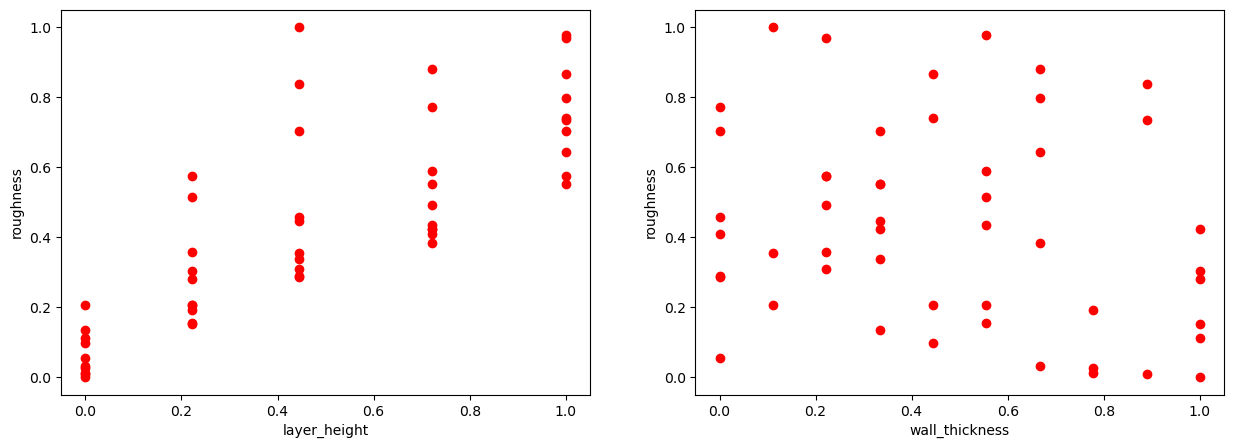

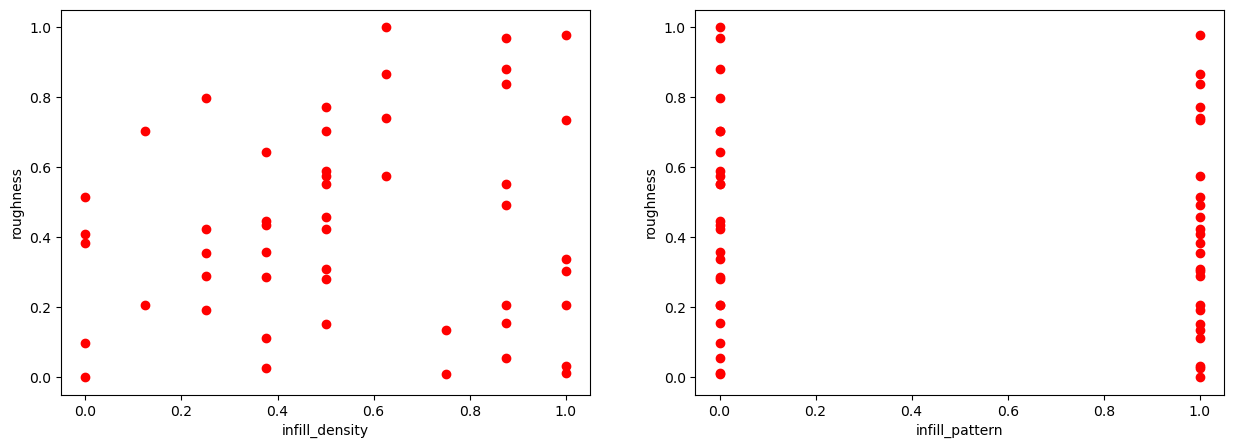

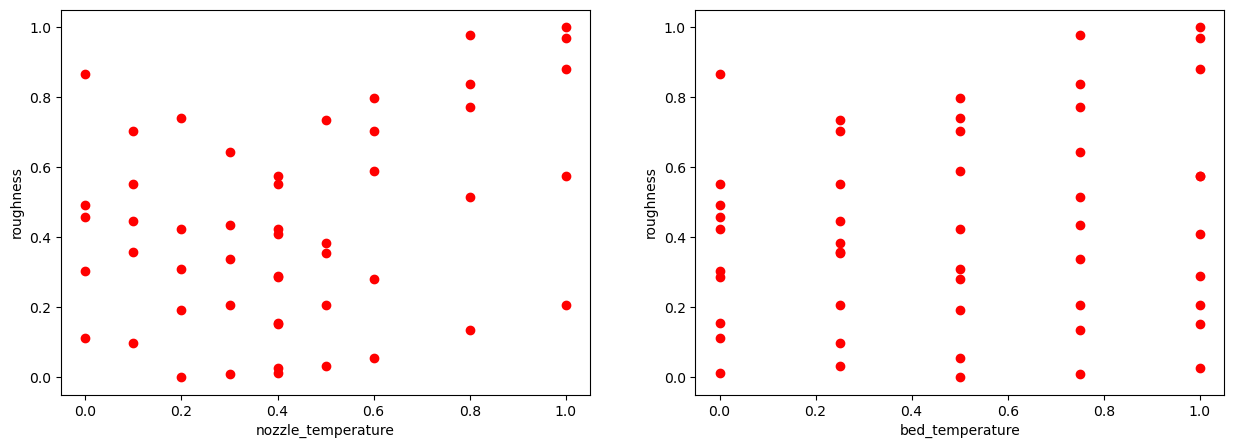

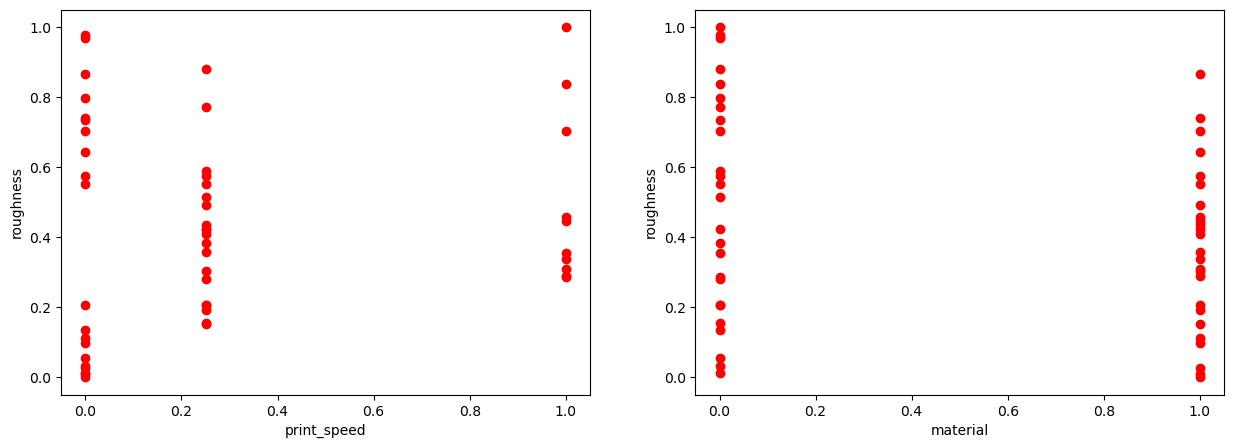

In [12]:
# plotting roughness versus differnet features
i=0
while i< 8:
    plt.figure(figsize=(15,5))
    for s in [1,2]:
        plt.subplot(1,2,s)
        plt.scatter(features[:,i],roughness , color = 'red')
        plt.xlabel(features_name[i])
        plt.ylabel('roughness')
        i+=1

### gradient descent method 

In [13]:
#gradient method for multi feature linear regression
def gradient_descent(x, y , theta_init , n , epsilon):
    """
        This function reuturns theta, final cost function, cost function array and
        maximum iteration until convergence (i).
        x : input 
        y : output
        theta_init : initial guess for theta coefficient
        alpha: learning rate
        n : maximum iteration
        epsilon : accuracy
    """
    alpha = 0.1 #learnin rate
    m = len(x) # number of data
    theta = theta_init #initial guess
    cost = np.ones(n) #initial guess
    cost_init1 = 10 #initial guess
    cost_init2 = 0 #initial guess
    i = 0 # counter
    while abs(cost_init1 - cost_init2)> epsilon and i < n:
        cost_init2 = cost_init1
        gradient = (-2/m) *x.T.dot(y-x.dot(theta))
        theta = theta -alpha*gradient
        cost[i] = (1/m) * sum (np.square(y-np.dot(x,theta)))
        cost_init1 = cost[i]
        i = i+1
        if i==n:
            print('The gradient descent method is not converged')
    return(theta,cost[:i], cost[i-1],i)

In [14]:
x = features[:,0:-1]
x = np.insert(x,0,1,axis=1) # add a column with number 1
y = features[:,-1].reshape(50,1)
theta = np.zeros((x.shape[1],1)) # initial theta guess
print(x.shape,y.shape,theta.shape)
theta_opt , cost_func_array , cost_func , i = gradient_descent(x, y , theta , n = 1000000, epsilon=1e-10)
print(theta_opt)
print(cost_func)
print(i)

(50, 10) (50, 1) (10, 1)
[[-8.45232702e-01]
 [ 6.58446698e-01]
 [ 6.03670857e-02]
 [-9.44376916e-03]
 [-4.16296746e-04]
 [ 2.15893035e+00]
 [-4.62152953e-01]
 [ 1.49706327e-01]
 [ 8.55279956e-01]
 [-4.62152953e-01]]
0.009960856644713516
21622


### using sklearn linear regression model to estimate the coefficients

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
weights=np.array(LR_model.coef_)
bias=LR_model.intercept_
print('weights:',weights)
print('bias:',bias)

weights: [[ 0.          0.65235232  0.06263847 -0.00471918 -0.01699097  1.96260331
  -0.40640198  0.1554408   0.76649879 -0.40640198]]
bias: [-0.76939168]


### Plotting Multi features linear regression results

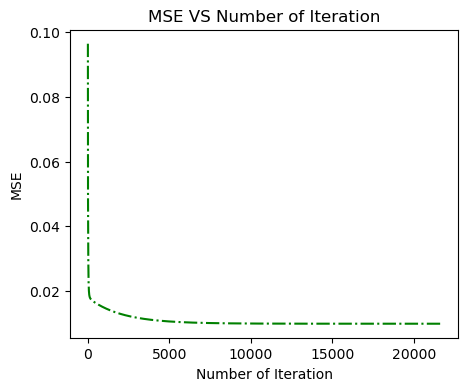

In [16]:
plt.figure(figsize=(5, 4))
plt.plot(cost_func_array, ls = '-.' , c='green')
plt.xlabel('Number of Iteration')
plt.ylabel('MSE')
plt.title('MSE VS Number of Iteration')
plt.show()